## Cargamos los datos de febrero 2020 / prueba

In [2]:
# Imports y configuración
import pandas as pd
import numpy as np
import os
import sys

# Permite importar desde ../src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

from features.build_features import preprocess
from modeling.predict import load_model, evaluate_model

In [6]:
import pandas as pd

# Cargar los datos de febrero
taxi_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-02.parquet')

# Definir columna objetivo
target_col = "high_tip"

# Preprocesar con la función correcta
taxi_test = preprocess(df=taxi_feb, target_col=target_col)

# Separar features y target
features = taxi_test.drop(columns=[target_col])
y_test = taxi_test[target_col]

In [7]:
taxi_test.head()

,tpep_dropoff_datetime,pickup_weekday,pickup_hour,work_hours,pickup_minute,passenger_count,trip_distance,trip_time,trip_speed,PULocationID,DOLocationID,RatecodeID,high_tip
0,2020-02-01 00:30:32,5.0,0.0,0.0,17.0,1.0,2.60,777.0,0.003346,145.0,7.0,1.0,1
1,2020-02-01 01:05:36,5.0,0.0,0.0,32.0,1.0,4.80,1969.0,0.002438,45.0,61.0,1.0,1
2,2020-02-01 00:43:28,5.0,0.0,0.0,31.0,1.0,3.20,704.0,0.004545,186.0,140.0,1.0,0
3,2020-02-01 00:31:39,5.0,0.0,0.0,7.0,1.0,4.38,1444.0,0.003033,144.0,140.0,1.0,0
4,2020-02-01 01:01:29,5.0,0.0,0.0,51.0,1.0,2.28,586.0,0.003891,238.0,152.0,1.0,0


### Cargamos el modelo que guardamos y realizamos predicciones de prueba

In [22]:
model_path = os.path.join(os.getcwd(), "..", "models", "random_forest_model.joblib")
model = load_model(model_path)

In [18]:
# model.feature_names_in_

In [20]:
# features = features[model.feature_names_in_]

In [24]:
from time import time

start = time()
f1_feb = evaluate_model(model, features, y_test)
print(f"F1-score para el conjunto de prueba (febrero 2020): {f1_feb:.4f}")
print(f"Tiempo total de evaluación: {time() - start:.2f} segundos")

F1-score para el conjunto de prueba (febrero 2020): 0.7350
Tiempo total de evaluación: 32.18 segundos


## Cargamos los datos de mayo 2020 / prueba

In [41]:
taxi_may = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-05.parquet')
target_col = "high_tip"
taxi_test = preprocess(taxi_may, target_col=target_col)

# Eliminar columnas que no estaban en el entrenamiento
features = taxi_test.drop(columns=[target_col, "tpep_dropoff_datetime"])
y_test = taxi_test[target_col]
y_test = (y_test > 0).astype(int)

In [42]:
start = time()
f1_may = evaluate_model(model, features, y_test)
print(f"F1-score para el conjunto de prueba (febrero 2020): {f1_may:.4f}")
print(f"Tiempo total de evaluación: {time() - start:.2f} segundos")

F1-score para el conjunto de prueba (febrero 2020): 0.6167
Tiempo total de evaluación: 1.91 segundos


## Cargamos los datos de agosto 2020 / prueba

In [45]:
taxi_agosto = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2020-08.parquet')
target_col = "high_tip"
taxi_test = preprocess(taxi_agosto, target_col=target_col)

# Eliminar columnas que no estaban en el entrenamiento
features = taxi_test.drop(columns=[target_col, "tpep_dropoff_datetime"])
y_test = taxi_test[target_col]
y_test = (y_test > 0).astype(int)

In [48]:
start = time()
f1_agosto = evaluate_model(model, features, y_test)
print(f"F1-score para el conjunto de prueba (febrero 2020): {f1_agosto:.4f}")
print(f"Tiempo total de evaluación: {time() - start:.2f} segundos")

F1-score para el conjunto de prueba (febrero 2020): 0.6808
Tiempo total de evaluación: 5.23 segundos


## Comparamos las métricas F1-score de los 3 períodos.

In [50]:
# Diccionario con los F1-scores
f1_scores = {
    "Febrero 2020": f1_feb,
    "Mayo 2020": f1_may,
    "Agosto 2020": f1_agosto
}

# Convertimos a DataFrame
f1_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=["F1-score"])
f1_df.index.name = "Periodo"
f1_df = f1_df.round(4)

display(f1_df)


,F1-score
Periodo,
Febrero 2020,0.7350
Mayo 2020,0.6167
Agosto 2020,0.6808


In [64]:
with open("f1_train.json", "r") as f:
    f1_train = json.load(f)["f1_train"]


In [66]:
f1 = 0.7297 #del entrenamiento

f1_scores_completo = {
    "Enero 2020 (entrenamiento)": f1,
    "Febrero 2020 (prueba)": f1_feb,
    "Mayo 2020 (prueba)": f1_may,
    "Agosto 2020 (prueba)": f1_agosto
}


In [68]:
f1_df_completo = pd.DataFrame.from_dict(f1_scores_completo, orient='index', columns=["F1-score"])
f1_df_completo.index.name = "Periodo"
f1_df_completo = f1_df_completo.round(4)

display(f1_df_completo)

,F1-score
Periodo,
Enero 2020 (entrenamiento),0.7297
Febrero 2020 (prueba),0.7350
Mayo 2020 (prueba),0.6167
Agosto 2020 (prueba),0.6808


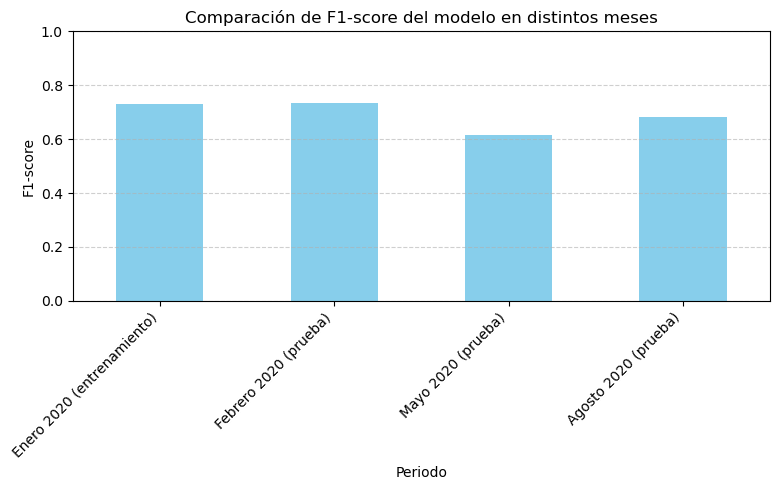

In [70]:
import matplotlib.pyplot as plt

f1_df_completo.plot(kind='bar', legend=False, figsize=(8, 5), color="skyblue")
plt.title("Comparación de F1-score del modelo en distintos meses")
plt.ylabel("F1-score")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
